# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [84]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from pylab import rcParams
rcParams['figure.figsize'] = 9, 8



#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv(r'C:\Users\aksha\Documents\Project of python\iris\datasets_19_420_Iris.csv')



In [42]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 6)


In [44]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [86]:
iris_SP = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
iris_SP.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["Species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# (3.2) 2-D Scatter Plot

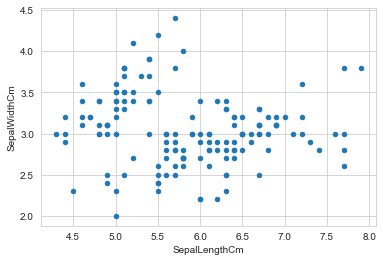

In [46]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

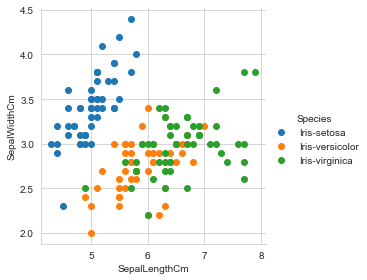

In [47]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using SepalLengthCm and SepalWidthCm features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

#  (3.3) Pair-plot

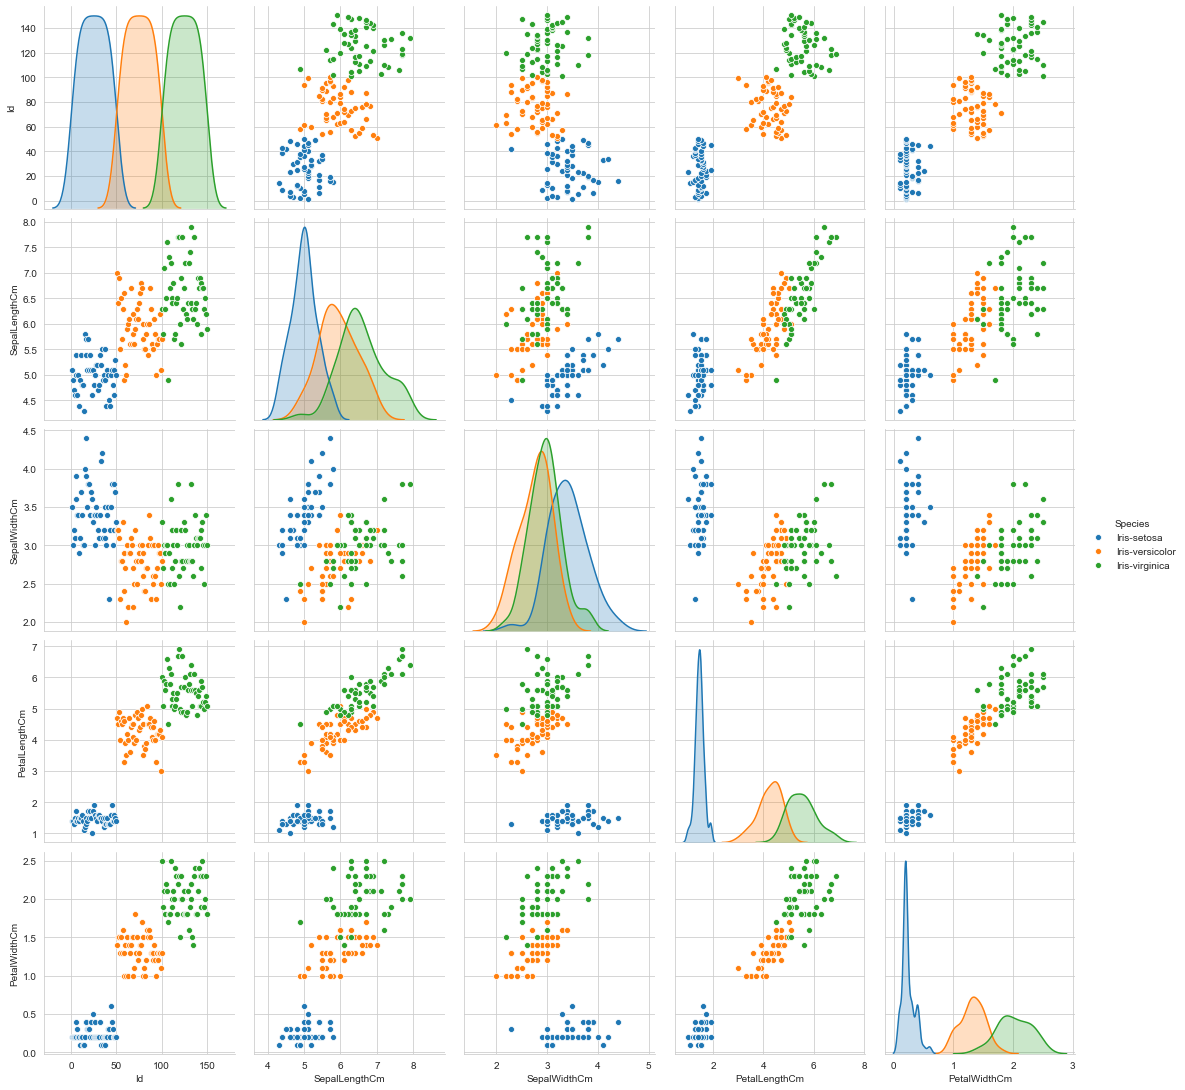

In [48]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. PetalLengthCm and PetalWidthCm are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

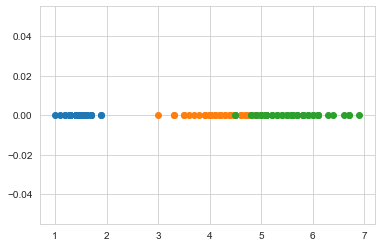

In [49]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["Species"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["Species"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa['PetalLengthCm']), 'o')
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor['PetalLengthCm']), 'o')
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica['PetalLengthCm']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

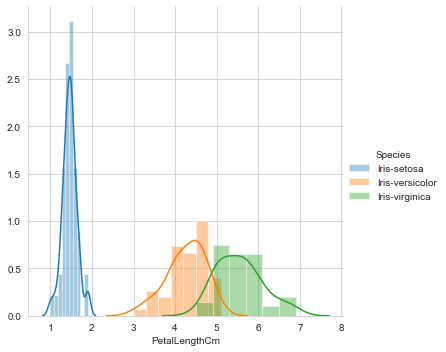

In [50]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend();
plt.show();



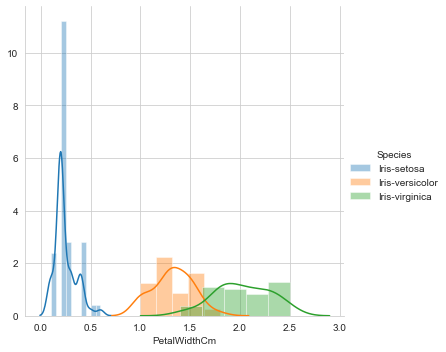

In [51]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend();
plt.show();

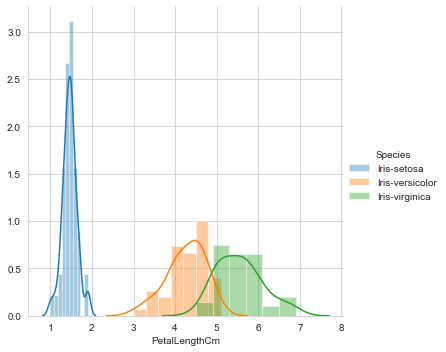

In [52]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend();
plt.show();

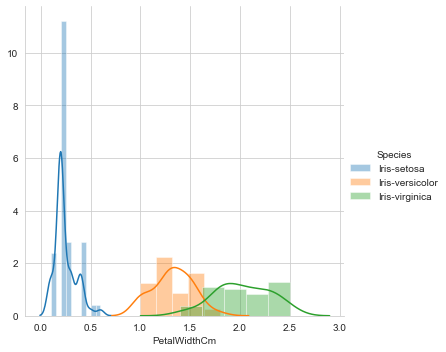

In [53]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend();
plt.show();

In [54]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


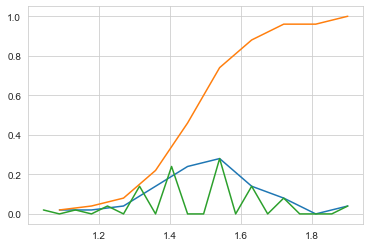

In [55]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


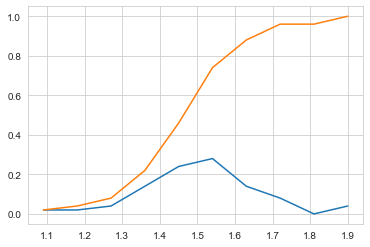

In [56]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


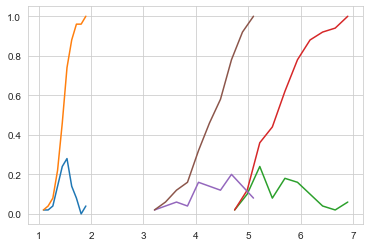

In [57]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [58]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["PetalLengthCm"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["PetalLengthCm"],50)));
print(np.mean(iris_virginica["PetalLengthCm"]))
print(np.mean(iris_versicolor["PetalLengthCm"]))

print("\nStd-dev:");
print(np.std(iris_setosa["PetalLengthCm"]))
print(np.std(iris_virginica["PetalLengthCm"]))
print(np.std(iris_versicolor["PetalLengthCm"]))





Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [59]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["PetalLengthCm"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["PetalLengthCm"],50)));
print(np.median(iris_virginica["PetalLengthCm"]))
print(np.median(iris_versicolor["PetalLengthCm"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["PetalLengthCm"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],90))
print(np.percentile(iris_virginica["PetalLengthCm"],90))
print(np.percentile(iris_versicolor["PetalLengthCm"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(iris_virginica["PetalLengthCm"]))
print(robust.mad(iris_versicolor["PetalLengthCm"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# (3.7) Box plot and Whiskers

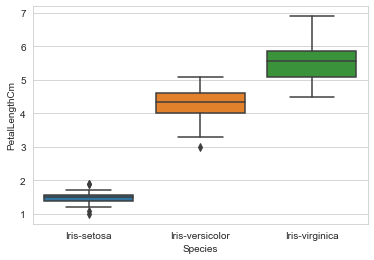

In [60]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Species',y='PetalLengthCm', data=iris)
plt.show()

# (3.8) Violin plots

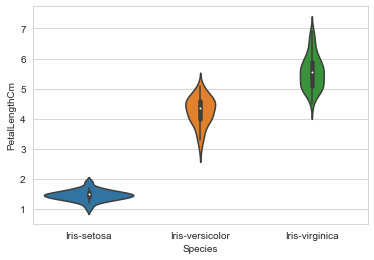

In [61]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=8)
plt.show()

# (3.9) Summarizing plots in english
* Exaplain your findings/conclusions in plain english
* Never forget your objective (the probelm you are solving) . Perform all of your EDA aligned with your objectives.

# (3.10) Univariate, bivariate and multivariate analysis.



Def: Univariate, Bivariate and Multivariate analysis.


# (3.11) Multivariate probability density, contour plot.


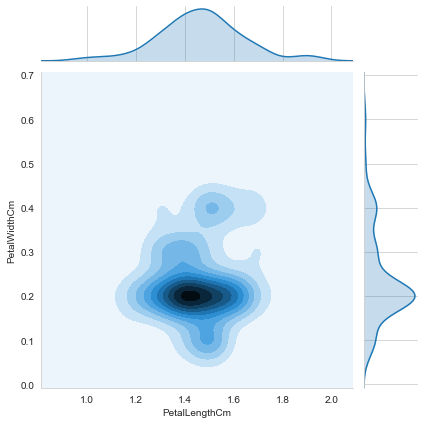

In [63]:
#2D Density plot, contors-plot
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris_setosa, kind="kde");
plt.show();


## K-means

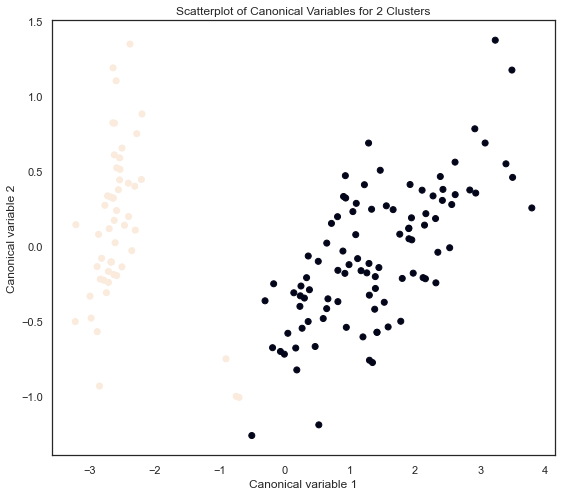

In [87]:
# Here we are just analyzing if we consider 2 cluster instead of 3 by using PCA 
model3=KMeans(n_clusters=2)
model3.fit(iris_SP) # has cluster assingments based on using 2 clusters
clusassign=model3.predict(iris_SP)
# plot clusters
''' Canonical Discriminant Analysis for variable reduction:
1. creates a smaller number of variables
2. linear combination of clustering variables
3. Canonical variables are ordered by proportion of variance accounted for
4. most of the variance will be accounted for in the first few canonical variables
'''
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(iris_SP) # fit CA to the train dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,) 
# plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show() 
# close or overlapping clusters idicate correlated variables with low in-class variance 
# but not good separation. 2 cluster might be better.

# Hierarchical Clustering

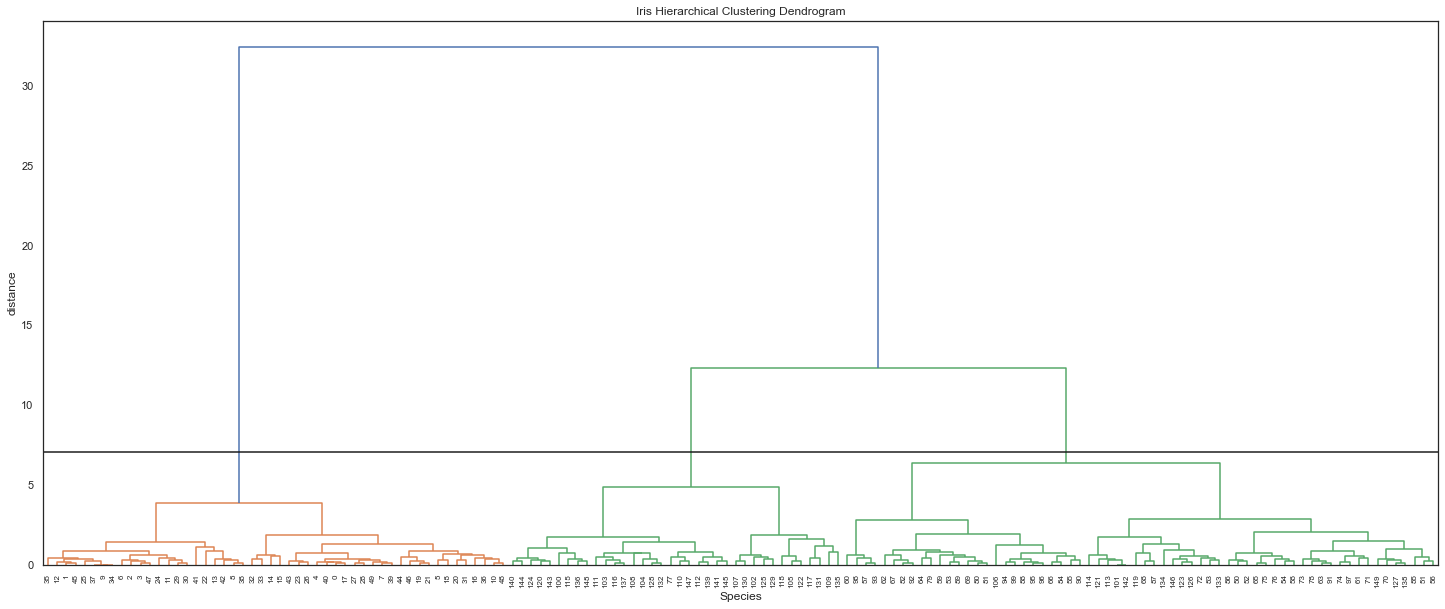

In [88]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(iris_SP, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

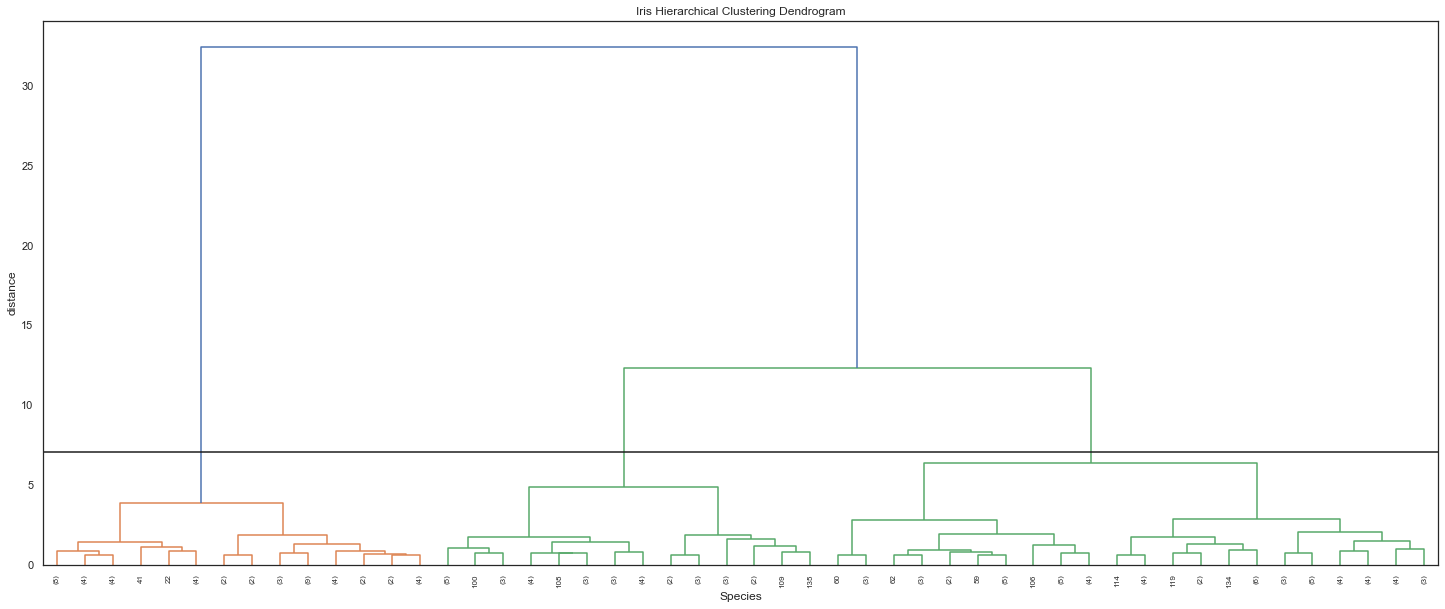

In [89]:
# calculate full dendrogram for 50
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(iris_SP, 'ward')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [64]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]



In [65]:
from scipy import stats
stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)


KstestResult(statistic=0.46, pvalue=3.800827929128319e-05)

In [66]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


KstestResult(statistic=0.22269319977269042, pvalue=0.6279885299231226)

In [67]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')


KstestResult(statistic=0.15344759748591397, pvalue=0.016028676530627672)

In [68]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')


KstestResult(statistic=0.07782342703215572, pvalue=1.0278510054918056e-05)

In [76]:
# Split data into a training set and a testing set.
# train_test_split shuffle the data before the split (shuffle=True by default)
from sklearn.model_selection import train_test_split
X=iris.drop(['Species', 'Id'], axis=1)
y=iris['Species']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.5, shuffle=True,random_state=100)

In [77]:
from sklearn.svm import SVC
model=SVC(C=1, kernel='rbf', tol=0.001)
model.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
###We get predictions from the model now and create a confusion matrix and a classification report.
pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pred))

[[28  0  0]
 [ 0 17  0]
 [ 0  5 25]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.77      1.00      0.87        17
 Iris-virginica       1.00      0.83      0.91        30

       accuracy                           0.93        75
      macro avg       0.92      0.94      0.93        75
   weighted avg       0.95      0.93      0.93        75



Accuracy score is:  0.9333333333333333
